In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
df = pd.read_csv("3r3k_T_GLH_mon.csv")
print(df)

  force field implicit solvent    rog_avg  end-to-end_avg
0      ff99SB             GBn2  19.340220        1.186793
1      ff99SB              GBn  19.914638        1.279368
2   ff99SBnmr             OBC2  20.918362        1.639429
3      ff14SB              GBn  15.564321        1.486583
4        ff96             OBC2  17.975878        2.953210
5      ff14SB             OBC2  19.579379        1.484269
6        ff94             OBC2  19.722022        1.450072
7        ff98             OBC2  17.130748        1.358977
8        ff96              GBn  22.737543        1.559182


In [3]:
df['force field']

0       ff99SB
1       ff99SB
2    ff99SBnmr
3       ff14SB
4         ff96
5       ff14SB
6         ff94
7         ff98
8         ff96
Name: force field, dtype: object

In [4]:
ff = []
impl = []
end2end = []

for item in df['force field']:
    ff.append(item)

for model in df['implicit solvent']:
    impl.append(model)

for val in df['end-to-end_avg']:
    end2end.append(val)

In [5]:
ff_cols = list(sorted(set(ff)))
impl_cols = list(sorted(set(impl)))

In [6]:
ff_cols

['ff14SB', 'ff94', 'ff96', 'ff98', 'ff99SB', 'ff99SBnmr']

In [7]:
impl_cols

['GBn', 'GBn2', 'OBC2']

In [8]:
array = np.zeros((len(impl_cols), len(ff_cols)))

In [9]:
for idx in range(len(ff)):
    array[impl_cols.index(impl[idx])][ff_cols.index(ff[idx])] = end2end[idx]

In [10]:
array

array([[1.48658273, 0.        , 1.55918173, 0.        , 1.27936757,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.18679332,
        0.        ],
       [1.48426867, 1.45007213, 2.95320957, 1.358977  , 0.        ,
        1.6394287 ]])

In [11]:
x_axis_labels = ff_cols
y_axis_labels = impl_cols

In [12]:
system_name = 'CC-Hex*-T, all E protonated'

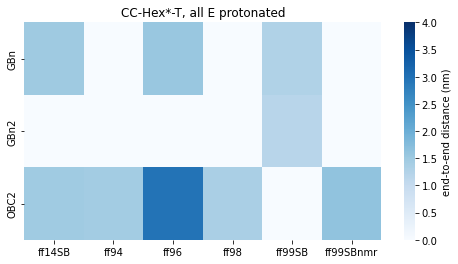

In [14]:
plt.figure(figsize=(8,4))

ax = sns.heatmap(array, xticklabels = x_axis_labels, yticklabels = y_axis_labels, vmin = 0, vmax = 4, cmap = 'Blues', 
                 cbar_kws = {'label': 'end-to-end distance (nm)'})

ax.set_title(system_name)
fig = ax.get_figure()
fig.savefig('heatmap.png')